# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

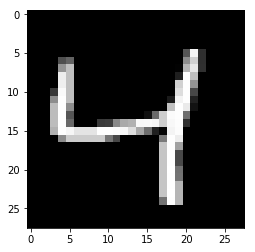

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = 28 * 28

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size])
targets_ = tf.placeholder(tf.float32, [None, image_size])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded =  tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu) 

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size,  activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(1e-3).minimize(cost)

## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6958
Epoch: 1/20... Training loss: 0.6927
Epoch: 1/20... Training loss: 0.6899
Epoch: 1/20... Training loss: 0.6869
Epoch: 1/20... Training loss: 0.6834
Epoch: 1/20... Training loss: 0.6790
Epoch: 1/20... Training loss: 0.6736
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6589
Epoch: 1/20... Training loss: 0.6492
Epoch: 1/20... Training loss: 0.6392
Epoch: 1/20... Training loss: 0.6279
Epoch: 1/20... Training loss: 0.6135
Epoch: 1/20... Training loss: 0.5985
Epoch: 1/20... Training loss: 0.5826
Epoch: 1/20... Training loss: 0.5668
Epoch: 1/20... Training loss: 0.5503
Epoch: 1/20... Training loss: 0.5308
Epoch: 1/20... Training loss: 0.5119
Epoch: 1/20... Training loss: 0.4939
Epoch: 1/20... Training loss: 0.4760
Epoch: 1/20... Training loss: 0.4527
Epoch: 1/20... Training loss: 0.4410
Epoch: 1/20... Training loss: 0.4259
Epoch: 1/20... Training loss: 0.4058
Epoch: 1/20... Training loss: 0.4034
Epoch: 1/20... Training loss: 0.3842
E

Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1883
E

Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1683
Epoch: 2/20... Training loss: 0.1636
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1569
E

Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1338
E

Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1226
E

Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1175
E

Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1110
E

Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1043
E

Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1062
E

Epoch: 7/20... Training loss: 0.0941
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0943
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0947
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0975
E

Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0968
E

Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0901
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0956
E

Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20

Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0890
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0899
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0989
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0884
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.1003
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0887
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0887
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0872
Epoch: 19/20... Training loss: 0.0983
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0886
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0988
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

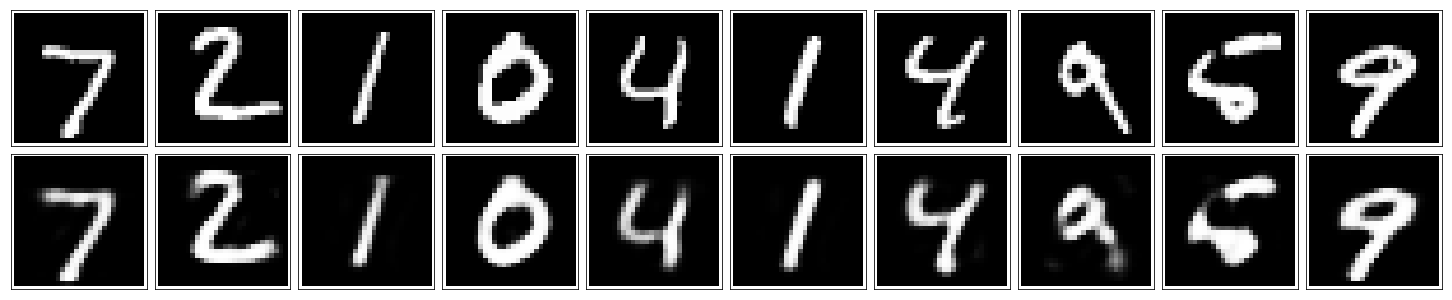

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.